# Lab 4 - Andre Piccolo - 300347025

## Import libray

In [309]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

## Read Data

In [310]:
df = pd.read_csv('car_auction.csv')
df.head()

,year,make,body,transmission,condition,odometer,color,interior,mmr,sellingprice
0,2013,Ford,coupe,automatic,2.2,36941,silver,black,15000,12800
1,2013,Dodge,sedan,automatic,3.7,27601,white,tan,13100,14800
2,2014,Ford,sedan,automatic,3.5,14184,silver,black,17700,16500
3,2006,Nissan,suv,automatic,4.3,193516,silver,black,3175,4400
4,2005,Saturn,sedan,automatic,3.8,104969,white,gray,2500,2900


In [311]:
df.isnull().sum()

year            0
make            0
body            0
transmission    0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
dtype: int64

## Prepare Dataset

In [312]:
# Create dummies for object categories
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106550 entries, 0 to 106549
Data columns (total 73 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 106550 non-null  int64  
 1   condition            106550 non-null  float64
 2   odometer             106550 non-null  int64  
 3   mmr                  106550 non-null  int64  
 4   sellingprice         106550 non-null  int64  
 5   make_Aston Martin    106550 non-null  uint8  
 6   make_Audi            106550 non-null  uint8  
 7   make_BMW             106550 non-null  uint8  
 8   make_Bentley         106550 non-null  uint8  
 9   make_Buick           106550 non-null  uint8  
 10  make_Cadillac        106550 non-null  uint8  
 11  make_Chevrolet       106550 non-null  uint8  
 12  make_Chrysler        106550 non-null  uint8  
 13  make_Dodge           106550 non-null  uint8  
 14  make_FIAT            106550 non-null  uint8  
 15  make_Ferrari     

## Feature Selection

In [313]:
target=df['sellingprice']
features=df.drop(['sellingprice'], axis=1)
features.shape

(106550, 72)

## Select From Model using Random Forest as estimator

In [314]:
sfm_selec = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, max_leaf_nodes=8)).fit(features, target)
sfm_df = sfm_selec.transform(features)
sfm_df.shape

(106550, 9)

## Load Regression Models

In [315]:
models=[]
y_preds=[]
r2=[]
rmse=[]
name=[]

X_train, X_test, y_train, y_test = train_test_split(sfm_df, target, test_size=0.25)

def loadModelInfo(model):
    models.append(model)
    name.append(model.__class__.__name__)

## Linear Regressor

In [316]:
loadModelInfo(LinearRegression())

## SGD Regressor

In [317]:
# Changed the default eta0 because default value is too high resulting in weird values to r2 and rmse
# research from this link: https://stackoverflow.com/questions/31443840/sgdregressor-nonsensical-result
loadModelInfo(SGDRegressor(eta0=0.001))

## Decision Tree Regressor

In [318]:
loadModelInfo(DecisionTreeRegressor(max_depth=3))

## Gradient Boosting Regressor

In [319]:
loadModelInfo(GradientBoostingRegressor())

## Random Forest Regressor

In [320]:
loadModelInfo(RandomForestRegressor(n_estimators=100, max_depth=3))

## Ada Boost Regressor

In [321]:
loadModelInfo(AdaBoostRegressor(n_estimators=50))

## XGBoost Regressor

In [322]:
loadModelInfo(XGBRegressor(n_estimators=50))

## CatBoost Regressor

In [323]:
loadModelInfo(CatBoostRegressor(n_estimators=50))

## Create Pipeline

In [324]:
for model in models:
    pipe = Pipeline([('scaler', RobustScaler()),
                     ('preprocessor', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)),
                     ('regressor', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_preds.append(y_pred)
    r2.append(pipe.score(X_test, y_test))
    rmse.append(mean_squared_error(y_test, y_pred, squared=False))
    

Learning rate set to 0.5
0:	learn: 5543.1313367	total: 15.5ms	remaining: 759ms
1:	learn: 3442.8058035	total: 29.8ms	remaining: 715ms
2:	learn: 2502.3372606	total: 44.7ms	remaining: 700ms
3:	learn: 2150.0168734	total: 59.3ms	remaining: 681ms
4:	learn: 2008.0390012	total: 73ms	remaining: 657ms
5:	learn: 1919.4777726	total: 86.6ms	remaining: 635ms
6:	learn: 1856.7263982	total: 102ms	remaining: 624ms
7:	learn: 1813.5964465	total: 114ms	remaining: 599ms
8:	learn: 1792.0853117	total: 127ms	remaining: 580ms
9:	learn: 1758.0574142	total: 142ms	remaining: 569ms
10:	learn: 1733.8632008	total: 156ms	remaining: 551ms
11:	learn: 1701.8839204	total: 168ms	remaining: 533ms
12:	learn: 1681.5440410	total: 182ms	remaining: 519ms
13:	learn: 1664.9751095	total: 198ms	remaining: 508ms
14:	learn: 1655.8813322	total: 211ms	remaining: 493ms
15:	learn: 1633.9598245	total: 226ms	remaining: 481ms
16:	learn: 1625.9576949	total: 240ms	remaining: 466ms
17:	learn: 1618.9953276	total: 253ms	remaining: 450ms
18:	learn

In [325]:
res_df = pd.DataFrame(zip(name, r2, rmse), columns=['Model', 'R2 Score','RMSE'])
res_df

,Model,R2 Score,RMSE
0,LinearRegression,0.976237,1482.549744
1,SGDRegressor,0.976058,1488.127625
2,DecisionTreeRegressor,0.926321,2610.549763
3,GradientBoostingRegressor,0.976460,1475.567011
4,RandomForestRegressor,0.936174,2429.727220
5,AdaBoostRegressor,0.843613,3803.284076
6,XGBRegressor,0.976180,1484.324371
7,CatBoostRegressor,0.972741,1587.874868


In [326]:
# Find the better model with max R2 Score
best_name_model = res_df.loc[res_df['R2 Score'].idxmax(), 'Model']
best_model = models[name.index(best_name_model)]
best_predict = y_preds[name.index(best_name_model)]
print("The best model is %s in position %d"% (best_name_model, name.index(best_name_model)))

The best model is GradientBoostingRegressor in position 3


## Plot Best Model

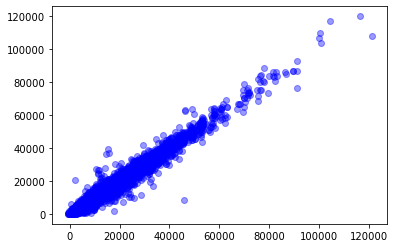

In [327]:
plt.scatter(best_predict, y_test, alpha=0.4, color='b')